In [2]:
!pip install pandas
!pip install pymongo
import pandas as pd
from pymongo import MongoClient

In [44]:
client = MongoClient('mongodb://localhost:27017/')
db = client['dsbda_project'] 

In [45]:
nan = float("nan")
conditions = [{"latitude" : {"$ne" : nan}}, {"longitude" : {"$ne" : nan}}, {"price" : {"$ne" : -1.0}}, 
              {"date" : {"$ne" : None}}, {"neighborhood" : {"$ne" : None}}, {"review_scores_rating" : {"$ne" : None}}, 
              {"review_scores_accuracy" : {"$ne" : None}}, {"review_scores_cleanliness" : {"$ne" : None}}, 
              {"review_scores_checkin" : {"$ne" : None}}, {"review_scores_communication" : {"$ne" : None}}, 
              {"review_scores_location" : {"$ne" : None}}, {"review_scores_value" : {"$ne" : None}},
              {"review_per_month" : {"$ne" : None}}]

In [46]:
result = db.row.find({"$and" : conditions}, {"_id" : 0, "listing_id" : 1, "neighborhood" : 1, "latitude" : 1, 
                                             "longitude" : 1, "price" : 1, "review_scores_rating" : 1, "review_scores_accuracy" : 1,
                                             "review_scores_cleanliness" : 1, "review_scores_checkin" : 1, "review_scores_communication" : 1,
                                             "review_scores_location" : 1, "review_scores_value" : 1, "review_per_month" : 1,
                                             "date" : 1, "comment" : 1})
#result = db.row.find({}, {"latitude" : 1, "longitude" : 1, "price" : 1, "date" : 1, "_id" : 0}).sort("date", 1)
document_count = db.row.count_documents({"$and" : conditions})

In [47]:
print(document_count)
pd.set_option('display.float_format', lambda x: '%.12f' % x)
df = pd.DataFrame(list(result))
df.head(5)

431355


,listing_id,neighborhood,latitude,longitude,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,review_per_month,date,comment
0,9996278,OudNoord,52.391567597720,4.926034915463,65.000000000000,90.000000000000,9.000000000000,9.000000000000,7.000000000000,9.000000000000,9.000000000000,9.000000000000,0.110000000000,2016-02-22,My friends and I really enjoyed our stay at Im...
1,9996278,OudNoord,52.391567597720,4.926034915463,65.000000000000,90.000000000000,9.000000000000,9.000000000000,7.000000000000,9.000000000000,9.000000000000,9.000000000000,0.110000000000,2016-02-07,I enjoyed Imkes place Despite the fact that th...
2,9996278,OudNoord,52.391567597720,4.926034915463,65.000000000000,90.000000000000,9.000000000000,9.000000000000,7.000000000000,9.000000000000,9.000000000000,9.000000000000,0.110000000000,2016-01-24,Probably the coolest house in Amsterdam. All o...
3,9996278,OudNoord,52.391567597720,4.926034915463,65.000000000000,90.000000000000,9.000000000000,9.000000000000,7.000000000000,9.000000000000,9.000000000000,9.000000000000,0.110000000000,2015-12-31,Vert nice house We spend a great stay
4,9992899,CentrumWest,52.375859759374,4.893092078023,79.000000000000,95.000000000000,9.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000,9.000000000000,0.340000000000,2016-02-21,We loved every minute of our stay here. Liselo...


In [48]:
df["date"] = pd.to_datetime(df["date"], format='%Y-%m-%d')
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day
df.drop(columns = ["date"], inplace=True)

In [49]:
df.head(5)

,listing_id,neighborhood,latitude,longitude,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,review_per_month,comment,year,month,day
0,9996278,OudNoord,52.391567597720,4.926034915463,65.000000000000,90.000000000000,9.000000000000,9.000000000000,7.000000000000,9.000000000000,9.000000000000,9.000000000000,0.110000000000,My friends and I really enjoyed our stay at Im...,2016,2,22
1,9996278,OudNoord,52.391567597720,4.926034915463,65.000000000000,90.000000000000,9.000000000000,9.000000000000,7.000000000000,9.000000000000,9.000000000000,9.000000000000,0.110000000000,I enjoyed Imkes place Despite the fact that th...,2016,2,7
2,9996278,OudNoord,52.391567597720,4.926034915463,65.000000000000,90.000000000000,9.000000000000,9.000000000000,7.000000000000,9.000000000000,9.000000000000,9.000000000000,0.110000000000,Probably the coolest house in Amsterdam. All o...,2016,1,24
3,9996278,OudNoord,52.391567597720,4.926034915463,65.000000000000,90.000000000000,9.000000000000,9.000000000000,7.000000000000,9.000000000000,9.000000000000,9.000000000000,0.110000000000,Vert nice house We spend a great stay,2015,12,31
4,9992899,CentrumWest,52.375859759374,4.893092078023,79.000000000000,95.000000000000,9.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000,9.000000000000,0.340000000000,We loved every minute of our stay here. Liselo...,2016,2,21


In [50]:
df.dtypes

listing_id                       int64
neighborhood                    object
latitude                       float64
longitude                      float64
price                          float64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
review_per_month               float64
comment                         object
year                             int32
month                            int32
day                              int32
dtype: object

In [7]:
!pip install plotly
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

In [14]:
df_2009 = df[df["year"] == 2009]
df_2009.head()

,listing_id,neighborhood,latitude,longitude,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,review_per_month,comment,year,month,day
185360,2818,Oostelijk Havengebied Indische Buurt,52.365754513876,4.941419235184,59.000000000000,97.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000,9.000000000000,10.000000000000,2.100000000000,Daniels apartment and room was spotless. Danie...,2009,11,25
185361,2818,Oostelijk Havengebied Indische Buurt,52.365754513876,4.941419235184,59.000000000000,97.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000,9.000000000000,10.000000000000,2.100000000000,Daniel has been more then a great host it was ...,2009,11,23
185362,2818,Oostelijk Havengebied Indische Buurt,52.365754513876,4.941419235184,59.000000000000,97.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000,9.000000000000,10.000000000000,2.100000000000,Daniel was great. He couldn.t do enough for us...,2009,11,4
185363,2818,Oostelijk Havengebied Indische Buurt,52.365754513876,4.941419235184,59.000000000000,97.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000,9.000000000000,10.000000000000,2.100000000000,Daniel was a fantastic host. His place is calm...,2009,10,1
185364,2818,Oostelijk Havengebied Indische Buurt,52.365754513876,4.941419235184,59.000000000000,97.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000,9.000000000000,10.000000000000,2.100000000000,You cant have a nicer start in Amsterdam. Dani...,2009,9,6


In [3]:
import pickle
with open('dataframe_with_scores.pkl', 'rb') as file:
    df_with_score = pickle.load(file)

In [53]:
center_long = 4.8955
center_lati = 52.368
#radius = 0.055 # unlock for circular neighborhood (intorno circolare)
#theta = np.linspace(0, 2 * np.pi, 100)
#x = center_long + radius * np.cos(theta)
#y = center_lati + radius * np.sin(theta)

semi_major_axis = 0.0475
semi_minor_axis = 0.0270
theta = np.linspace(0, 2 * np.pi, 100)

# Ellipse creation -> this defines my center
x = center_long + semi_major_axis * np.cos(theta)
y = center_lati + semi_minor_axis * np.sin(theta)

In [ ]:
years = sorted(df_with_score["year"].unique())

#Plot over the years of the location of air bnbs
for year in years:
    df_tmp = df_with_score[df_with_score["year"] == year]
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=df_tmp, x="longitude", y="latitude", hue="neighborhood", s=5, legend=False, sizes=(800, 600), palette="flare")
    plt.plot(x, y)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title(f"Airbnb host distribution in {year}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()

In [257]:
!pip install nltk
!pip install vader

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 1.5 MB/s eta 0:00:0000:0100:010m
  Created wheel for sonopy: filename=sonopy-0.1.2-py3-none-any.whl size=2854 sha256=1f8426474226eb98c76384cf9fb3c43042751c9eda4447773414ea9d4b1d6234
  Stored in directory: /home/ubuntu/.cache/pip/wheels/1f/82/ee/3e858c78c0734f6fe30ade1bd3ef040c7f45eedae6669e88f8
Successfully built sonopy


In [138]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ubuntu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [55]:
missing_or_empty_count = df['comment'].apply(lambda x: pd.isnull(x) or x == '').sum()
print(f"Number of missing or empty string values: {missing_or_empty_count}")

df_cleaned = df.dropna(subset=['comment'])
missing_or_empty_count = df_cleaned['comment'].apply(lambda x: pd.isnull(x) or x == '').sum()
print(f"Number of missing or empty string values: {missing_or_empty_count}")

nan_count = df['comment'].isnull().sum()
print(f"Number of NaN values: {nan_count}")

empty_string_count = (df['comment'] == '').sum()
print(f"Number of empty string values: {empty_string_count}")

Number of missing or empty string values: 13
Number of missing or empty string values: 0
Number of NaN values: 13
Number of empty string values: 0


In [ ]:
#This step requires almost 40 minutes (necessary to assign a score to each review)

df_with_score = df_cleaned
df_with_score['sentiment_score'] = df_with_score['comment'].apply(lambda x: SentimentIntensityAnalyzer().polarity_scores(x)['compound'])

In [143]:
#Serialize the structure in order to reload it whenever is necessary
import pickle
with open('dataframe_with_scores.pkl', 'wb') as file:
    pickle.dump(df_with_score, file)
df_with_score.tail()

,listing_id,neighborhood,latitude,longitude,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,review_per_month,comment,year,month,day,sentiment_score
431350,10003546,Zuid,52.348592066804,4.877561878508,120.000000000000,97.000000000000,10.000000000000,9.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000,0.220000000000,We spend an amazing weekend in AmsterdamNikita...,2016,10,2,0.955900000000
431351,10003546,Zuid,52.348592066804,4.877561878508,120.000000000000,97.000000000000,10.000000000000,9.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000,0.220000000000,Lappartement de Nikita est idalement situ une...,2016,5,22,0.000000000000
431352,10003546,Zuid,52.348592066804,4.877561878508,120.000000000000,97.000000000000,10.000000000000,9.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000,0.220000000000,Notre sjour dans lappartement de Nikita a t su...,2016,5,8,0.921700000000
431353,10003546,Zuid,52.348592066804,4.877561878508,120.000000000000,97.000000000000,10.000000000000,9.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000,0.220000000000,Many great thanks to Nikita and his lovely fam...,2016,5,4,0.993900000000
431354,10002942,CentrumWest,52.383194439461,4.888094470809,320.000000000000,100.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000,8.000000000000,0.030000000000,YAYS have been extremely helpful and professio...,2016,6,23,0.851600000000


In [59]:
import numpy as np
bins = [-1, -0.75, -0.25, 0.25, 0.75, 1] #Bins
labels = np.linspace(1, 5, num=5) #Labels (Very Bad, Bad, Neutral, Good, Very Good)
print(labels)
print(bins)
df_with_score['bin_sentiment'] = pd.cut(df_with_score['sentiment_score'], bins=bins, labels=labels, include_lowest=True)

[1. 2. 3. 4. 5.]
[-1, -0.75, -0.25, 0.25, 0.75, 1]


In [ ]:
df_with_score = df_with_score.dropna(subset=['longitude', 'latitude', 'year', 'bin_sentiment'])

for category in labels:    
    df_tmp = df_with_score[df_with_score["bin_sentiment"] == category]
    
    # Assegna la descrizione basata sulla categoria
    if category == 1:
        cat = "Very Bad"
    elif category == 2:
        cat = "Bad"
    elif category == 3:
        cat = "Neutral"
    elif category == 4:
        cat = "Good"
    elif category == 5:
        cat = "Very Good"

    df_tmp = df_tmp.sort_values(by="year")
    df_tmp['year'] = df_tmp['year'].astype('category')
    
    custom_colors = px.colors.qualitative.Vivid
    
    fig = px.scatter(df_tmp, 
                     x="longitude", 
                     y="latitude", 
                     animation_frame="year", 
                     title=f"Satisfaction level over the years: {cat}", 
                     width=800, 
                     height=600,
                     color='year',
                     color_discrete_sequence=custom_colors
                    )
    
    fig.update_layout(
        xaxis=dict(title='Longitude', range=[4.767, 5.028]),
        yaxis=dict(title='Latitude', range=[52.25, 52.45]),
        showlegend=False
    )
    
    fig.show()

In [ ]:
#Grouping the neighborhoods in inner and outer the center
list(df_with_score["neighborhood"].unique())

In [5]:
#looking at the geographical map of the city (online reference at: https://www.amsterdamforfree.it/tag/mappa/)
#It's possible obtain the name of the neighborhoods that are inside or outside the previosuly defined "center"
#So I will create a list of central neighborhoods
inner = ["CentrumWest", "CentrumOost", "Westerpark", "De Baarsjes  OudWest", "Oostelijk Havengebied  Indische Buurt",
         "OudOost", "De Pijp  Rivierenbuurt"]

In [63]:
from scipy.stats import mannwhitneyu

def analyze_difference(before_scores, after_scores, datetime1, datetime2):
        len_before = len(before_scores)
        len_after = len(after_scores)
        
        if len_before > 0 and len_after > 0:
            stat, p_val = mannwhitneyu(before_scores, after_scores, alternative='two-sided')
            
            print(f"Comparison: {datetime1} vs {datetime2}")
            print(f"P-value: {p_val}")
            #Null hypothesis -> the average of the two groups of data are the same
            if p_val < alpha:
                print("Significative difference between the sentiment scores before and after (Reject the null hypothesis).")
            else:
                print("Non-Significative difference between the sentiment scores before and after (Accept the null hypothesis).")

#If one of the two vectors has length 0 then nothing is done

In [64]:
df_with_score['date'] = pd.to_datetime(df_with_score[['year', 'month', 'day']])

alpha = 0.05

for year in range(2010, 2018):
    #Checks performed on year i and year i+1
    
    date_str_prev = f"{year}-06-01"
    date_str_next = f"{year+1}-06-01"
    
    date_prev = pd.to_datetime(date_str_prev)
    date_next = pd.to_datetime(date_str_next)

    next_year = year+1
    
    df_filtered = df_with_score[~df_with_score['neighborhood'].isin(inner)]
    df_out_center_prev = df_filtered[df_filtered['year'] == year]
    df_out_center_next = df_filtered[df_filtered['year'] == year+1]
    
    #Filter the sentiment scores of a particular year in 2 semesters, before and after a date
    sentiment_scores_outer_before_prev = df_out_center_prev[df_out_center_prev['date'] < date_prev]['sentiment_score']
    sentiment_scores_outer_after_prev = df_out_center_prev[df_out_center_prev['date'] >= date_prev]['sentiment_score']
    sentiment_scores_outer_before_next = df_out_center_next[df_out_center_next['date'] < date_next]['sentiment_score']
    sentiment_scores_outer_after_next = df_out_center_next[df_out_center_next['date'] >= date_next]['sentiment_score']

    #Performing the Mann-Withney U test
    analyze_difference(sentiment_scores_outer_before_prev, sentiment_scores_outer_after_prev, str(year) + " first semester", str(next_year) + " first semester")
    analyze_difference(sentiment_scores_outer_before_next, sentiment_scores_outer_after_next, str(year) + " second semester", str(next_year) + " second semester")
    
    #Cross-analisi anni
    if len(sentiment_scores_outer_before_prev) > 0 and len(sentiment_scores_outer_before_next) > 0:
        analyze_difference(sentiment_scores_outer_before_prev, sentiment_scores_outer_before_next, str(year) + " first semester", str(year) + " second semester")
        

Comparison: 2010 first semester vs 2011 first semester
P-value: 1.0
Non-Significative difference between the sentiment scores before and after (Accept the null hypothesis).
Comparison: 2010 second semester vs 2011 second semester
P-value: 0.199868078486232
Non-Significative difference between the sentiment scores before and after (Accept the null hypothesis).
Comparison: 2010 first semester vs 2010 second semester
P-value: 0.7450173057662387
Non-Significative difference between the sentiment scores before and after (Accept the null hypothesis).
Comparison: 2011 first semester vs 2012 first semester
P-value: 0.199868078486232
Non-Significative difference between the sentiment scores before and after (Accept the null hypothesis).
Comparison: 2011 second semester vs 2012 second semester
P-value: 0.7568032699239985
Non-Significative difference between the sentiment scores before and after (Accept the null hypothesis).
Comparison: 2011 first semester vs 2011 second semester
P-value: 0.85741

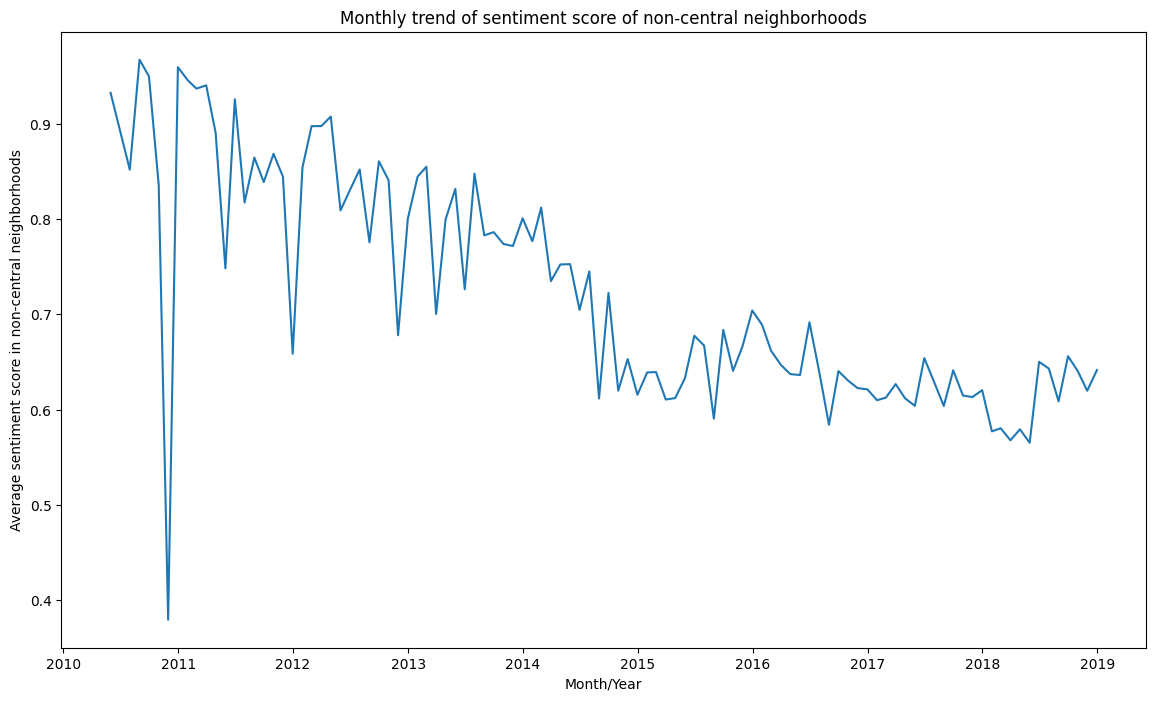

In [8]:
df_with_score['date'] = pd.to_datetime(df_with_score[['year', 'month', 'day']])

#Avg number of reviews by month in non-central neighborhood
mean_sentiment_by_month = df_with_score[~df_with_score['neighborhood'].isin(inner)].resample('M', on='date')['sentiment_score'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(data=mean_sentiment_by_month, x='date', y='sentiment_score')
plt.title('Monthly trend of sentiment score of non-central neighborhoods')
plt.xlabel('Month/Year')
plt.ylabel('Average sentiment score in non-central neighborhoods')
plt.show()
# il decremento di sentiment score, è associato ad un aumento di reviews "meno positive"? Vediamo il numero di recensioni

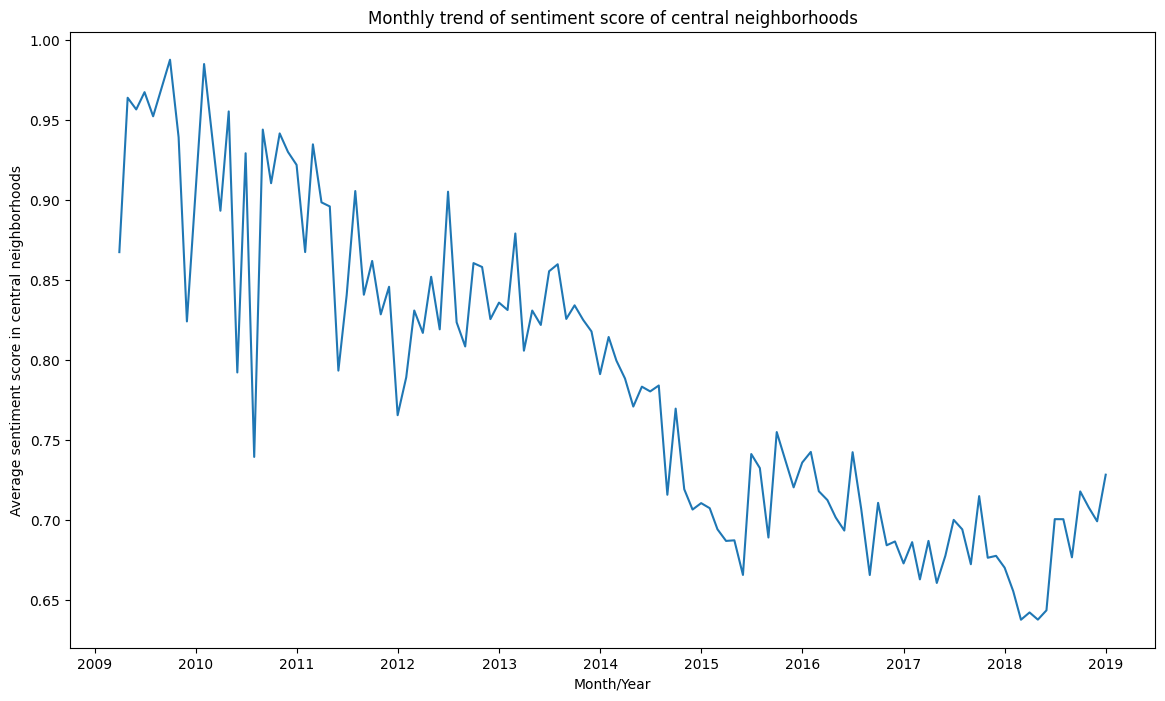

In [66]:
df_with_score['date'] = pd.to_datetime(df_with_score[['year', 'month', 'day']])
df_filtered_inner = df_with_score[df_with_score['neighborhood'].isin(inner)]
mean_sentiment_by_month = df_with_score[df_with_score['neighborhood'].isin(inner)].resample('M', on='date')['sentiment_score'].mean().reset_index()

#Avg number of reviews by month in central neighborhood
plt.figure(figsize=(14, 8))
sns.lineplot(data=mean_sentiment_by_month, x='date', y='sentiment_score')
plt.title('Monthly trend of sentiment score of central neighborhoods')
plt.xlabel('Month/Year')
plt.ylabel('Average sentiment score in central neighborhoods')
plt.show()

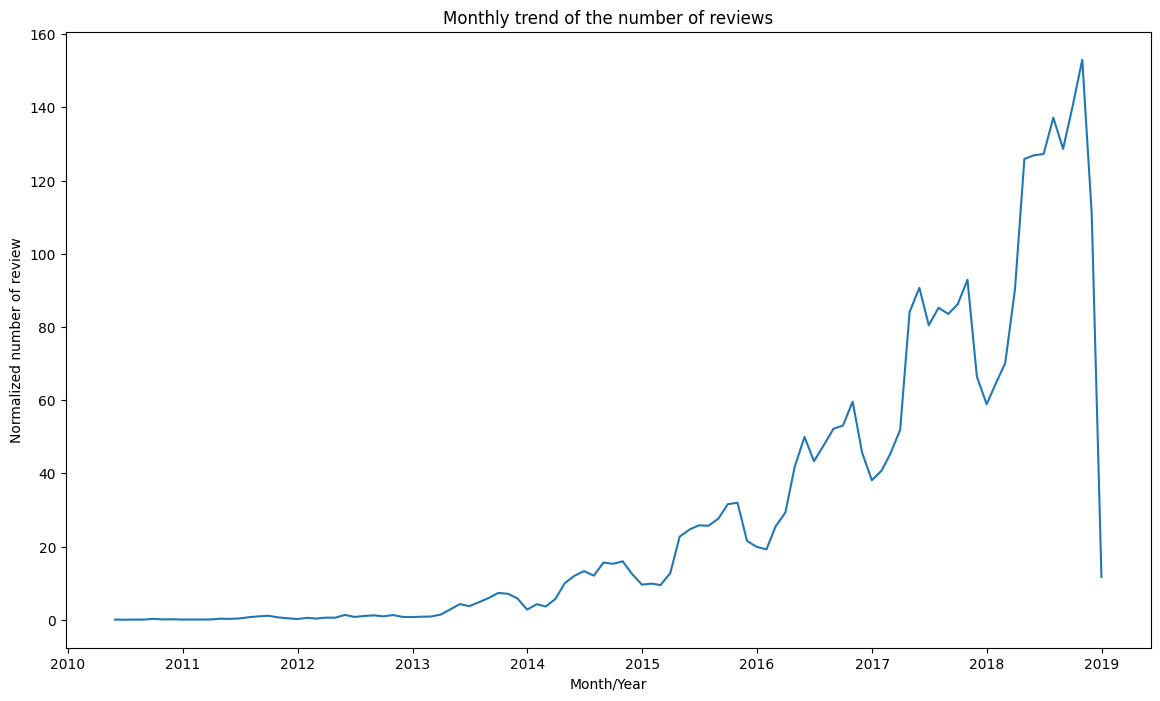

In [67]:
# Normalized Monthly reviews of non central neighborhood
df_with_score['date'] = pd.to_datetime(df_with_score[['year', 'month', 'day']])
review_count_by_month = df_with_score[~df_with_score['neighborhood'].isin(inner)].resample('M', on='date')['review_per_month'].sum().reset_index()
total_months = review_count_by_month['date'].nunique()
review_count_by_month['normalized_review_per_month'] = review_count_by_month['review_per_month'] / total_months

plt.figure(figsize=(14, 8))
sns.lineplot(data=review_count_by_month, x='date', y='normalized_review_per_month')
plt.title('Monthly trend of the number of reviews')
plt.xlabel('Month/Year')
plt.ylabel('Normalized number of review')
plt.show()

#un aumento del numero di reviews sembra ragionevole con l'ipotesi della gentrificazione in quanto con il test di whitney si rilevano le "variazioni" locali chiedere al prof)

In [ ]:
for neighborhood in df_with_score['neighborhood'].unique():
    if neighborhood not in inner:
        neighborhood_data = df_with_score[df_with_score['neighborhood'] == neighborhood].sort_values(by='date')
        plt.figure(figsize=(14, 8))
        sns.lineplot(x='date', y='sentiment_score', data=neighborhood_data, marker='o', label=neighborhood)
        plt.title(f'Trend del Sentiment Score nel Tempo per {neighborhood}')
        plt.xlabel('Data')
        plt.ylabel('Sentiment Score')
        plt.legend()
        plt.show()

In [2]:
import pickle
with open('dataframe_with_scores.pkl', 'rb') as file:
    df_with_score = pickle.load(file)